# General Notes about Lab

- read over the lab report guidelines
    - why am I concerned about your technical writing?
- do not expect recipe-style lab handouts
    - why do I refuse to give you recipes for the labs?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

In [2]:
filename = 'example_data.csv'

## First loadtxt attempt

In [3]:
data = np.loadtxt(filename)

ValueError: could not convert string to float: 'x,y'

Python gives very good and detailed erorr messages; you should learn to read them

- please don't send me an email that just says "my code has an error"
- read the error message yourself and think about it
- email me the full traceback

## Second Attempt

In [4]:
data = np.loadtxt(filename,skiprows=1)

ValueError: could not convert string to float: '0.0,2.37749559081'

Note that the code now skipped over the label row, but is still getting stuck because of the comma.

## Correct Usage of loadtxt

Load the data using `np.loadtxt`; note the use of the optional parameters `delimiter` and `skiprows`

- What happens if you remove either of these optional inputs?
- What does each option do and why are they necessary?

In [5]:
data = np.loadtxt(filename,delimiter=',',skiprows=1)

Verify that `data` was read correctly:

In [6]:
data

array([[ 0.        ,  2.37749559],
       [ 0.5       ,  3.50242599],
       [ 1.        ,  5.36544504],
       [ 1.5       ,  5.77951803],
       [ 2.        ,  6.30924357],
       [ 2.5       ,  7.57248615],
       [ 3.        ,  9.78458578],
       [ 3.5       ,  9.79908806],
       [ 4.        , 11.46402765],
       [ 4.5       , 12.33818689]])

Extract the columns of `data`, assigning the first column to `x` and the second to `y`:

In [7]:
x = data[:,0]
y = data[:,1]

Plot the data

Text(0,0.5,'y')

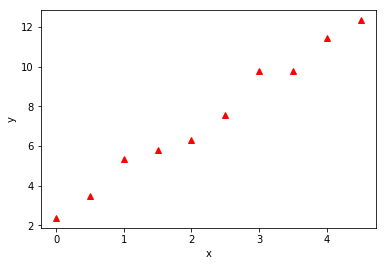

In [8]:
plt.figure()
plt.plot(x,y,'r^')
plt.xlabel('x')
plt.ylabel('y')

Let's create a linear model of the data:

In [9]:
#b_guess = 3
#m_guess = (12-3)/4.5
b_guess = 2
m_guess = 0.5

In [10]:
y_guess = m_guess*x+b_guess
y_guess

array([2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25])

Plot the guess with the data

Text(0,0.5,'y')

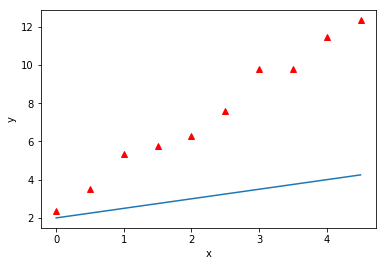

In [11]:
plt.figure()
plt.plot(x,y,'r^')
plt.plot(x,y_guess)
plt.xlabel('x')
plt.ylabel('y')

That looks pretty good, but is it the best linear model we can come up with?

Let's calculate the error between the model and the data:

In [12]:
error_vect = y-y_guess

In [13]:
error_vect

array([0.37749559, 1.25242599, 2.86544504, 3.02951803, 3.30924357,
       4.32248615, 6.28458578, 6.04908806, 7.46402765, 8.08818689])

In statistics, you learned to use the sum of the squared error as a measure of the closeness between a model and data.  Let's calculate that sum of squared errors

In [14]:
e_sum = np.sum(error_vect**2)
e_sum

245.9527688800258

- Why do we square the errors before adding them?

The best fit is when the squared sum of the errors is smallest.  This is called a least squares fit. We could vary `m` and `b` by hand and try to find the smallest possible squared error, but that would be tedious and unnecessary.  `optimize.fmin` uses a Nelder-Mead simplex algorithm to systematically vary the input parameters until a minimium is found.  We need model and cost functions to use `optimize.fmin`:

In [15]:
def mymodel(c):
    m = c[0]
    b = c[1]
    y_model = x*m+b
    return y_model

In [16]:
def mycost(c):
    y_model = mymodel(c)
    error_vect = y-y_model
    e_sum = np.sum(error_vect**2)
    return e_sum

Note that `c` is a list or vector of unknown coefficients.

In [17]:
mycost([m_guess,b_guess])

245.9527688800258

Note that this is the same as the sum of squared errors we calculated by hand above.

We are now ready to call `optimize.fmin` to find the best `m` and `b` estimates:

In [18]:
c_opt = optimize.fmin(mycost,[m_guess,b_guess])

Optimization terminated successfully.
         Current function value: 1.653950
         Iterations: 48
         Function evaluations: 95


Here are the optimized values:

In [19]:
c_opt

array([2.19179518, 2.49766821])

We can now pass the optimized `m` and `b` values to our model function to find the optmized `y`:

In [20]:
y_opt = mymodel(c_opt)

Now let's plot the data, the initial guess for `y`, and the optmized `y`:

Text(0,0.5,'y')

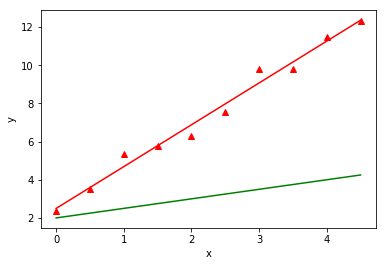

In [21]:
plt.figure()
plt.plot(x,y,'r^')
plt.plot(x,y_guess,'g-')
plt.plot(x,y_opt,'r-')
plt.xlabel('x')
plt.ylabel('y')

The optimized `y` is better, but it is not super dramatic because we gave `opmitize.fmin` pretty good initial guesses.  The `optimize.fmin` algorithm will get to the same answer in this case even if we give it bad guesses.

- Note that we cannot always get away with bad initial guesses, it depends on how complicated the model is and how many parameters there are to vary

# With bad guess

In [25]:
m_guess2 = 1
b_guess2 = 0
c_guess2 = [m_guess2,b_guess2]

In [26]:
mycost(c_guess2)

299.19612514696081

In [27]:
y_guess2 = mymodel(c_guess2)

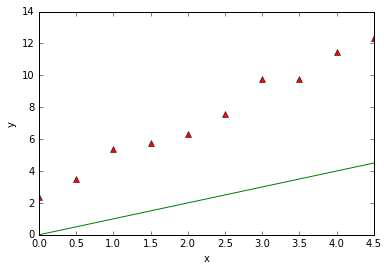

In [28]:
plt.figure()
plt.plot(x,y,'r^')
plt.plot(x,y_guess2,'g-')
#plt.plot(x,y_opt,'r-')
plt.xlabel('x')
plt.ylabel('y')

In [29]:
c_opt2 = optimize.fmin(mycost,c_guess2)

Optimization terminated successfully.
         Current function value: 1.653950
         Iterations: 72
         Function evaluations: 140


In [30]:
c_opt2

array([ 2.19180186,  2.49770612])

In [31]:
y_opt2 = mymodel(c_opt2)

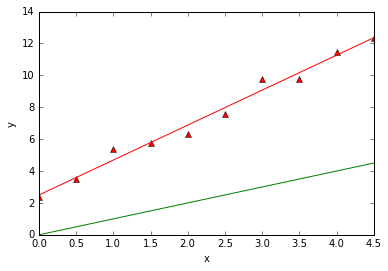

In [32]:
plt.figure()
plt.plot(x,y,'r^')
plt.plot(x,y_guess2,'g-')
plt.plot(x,y_opt,'r-')
plt.xlabel('x')
plt.ylabel('y')